In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# 勾配ブースティング回帰(勾配ブースティングマシン)
複数の決定木を組み合わせてより強力なモデルを構築するもう一つのアンサンブル学習の方法。  
ランダムフォレストとは対象的に、勾配ブースティングでは一つ前の決定木の誤りを次の決定木が修正するようにして、決定木を順番に作っていく。  
デフォルトでは勾配ブースティング回帰木に乱数性はなく、強力の事前枝狩りが用いられる。ポイントは**浅い決定木のような、簡単なモデル(弱学習器)を多数組み合わせることにある。**  

各ステップで弱学習器を構築して損失関数を最小化。次の学習器を構築する際に、間違えたデータのウェイトに重みをつけて、次のステップで誤りを正しくするように学習器を強化(ブースト)していく。**個々の決定木がどれほど誤りを強く補正しようとするかを制御するかのパラメータに学習率(laerning_rate)とい重要なパラメータがある。**誤りを強く補正しようとすると、モデルが複雑になり汎化性能が下がる。  
またn_estimatorsを多くし過ぎると、アンサンブルの中の決定木が誤りを補正する機会が増えるので、やはり汎化性能が下がる

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, random_state=0)

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (426, 30)
y_train shape: (426,)


In [8]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [12]:
print('Accurancy on trainning data : {:,.3f}'.format(gbrt.score(X_train, y_train)))
print('Accurancy on test data : {:,.3f}'.format(gbrt.score(X_test, y_test)))

Accurancy on trainning data : 1.000
Accurancy on test data : 0.958


In [14]:
#学習率を下げることで、誤りの補正具合を下げて汎化性能をあげる
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train,y_train)
print('Accurancy on trainning data : {:,.3f}'.format(gbrt.score(X_train, y_train)))
print('Accurancy on test data : {:,.3f}'.format(gbrt.score(X_test, y_test)))

Accurancy on trainning data : 0.988
Accurancy on test data : 0.965


In [15]:
#max_depthを制限してより強力に事前枝狩りを行う。
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)
print('Accurancy on trainning data : {:,.3f}'.format(gbrt.score(X_train, y_train)))
print('Accurancy on test data : {:,.3f}'.format(gbrt.score(X_test, y_test)))

Accurancy on trainning data : 0.991
Accurancy on test data : 0.972


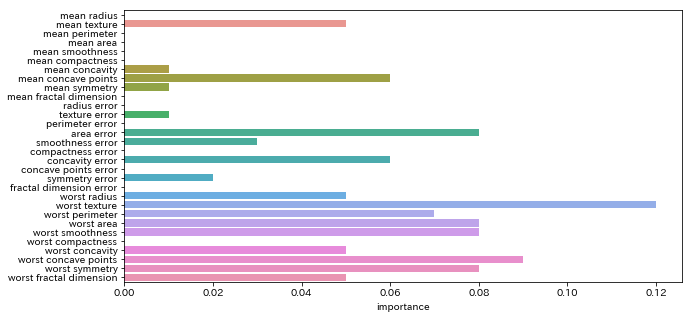

In [20]:
f_importance= pd.DataFrame(
    {'importance': gbrt.feature_importances_},
    index=cancer.feature_names
)
plt.figure(figsize=(10,5))
sns.barplot(x=f_importance.importance, y=f_importance.index,data=f_importance)

勾配ブースティング回帰木の特徴量重要度はランダムフォレストのそれと似通っているが、いくつかの特徴量は無視されていることがわかる。  

## まとめ
勾配ブースティング回帰木とランダムフォレストは同じようなデータを得意とするので、一般にはランダムフォレストの方が頑健なのでランダムフォレストを先に試した方が良い。 ランダムフォレストがうまく行ったとしても、モデルの性能を1%でも絞りたい場合には勾配ブースティングが良いだろう。(なのでコンペではこちらがよく使われる)。ただしランダムフォレストに比べるとパラメータ影響を受けやすい。  

#### 主要なパラメータ  
- n_estimators:決定木の数。大きくし過ぎると、誤り補正の機会が多くなるので過剰適合を引きおこす。ランダムフォレストでは逆で決定木の数を増やすことで、過剰適合を防いだこととは逆である。
- laerning_rate:どのくらい強く誤りを補正するか。小さくし過ぎると誤り補正が弱くなるので、複雑なモデルをつくるのにより多くの決定木を作る必要がある  

一般的に、n_estimatorsを時間とメモリ量で決めておき、learning_rateに対して探索を行う手法が用いられる(最初はn_estimatorsを探索して最後にlearning_rateの微調整を行う)。 
他には個々の決定木の複雑さの調整を行うmax_depth(もしくはmax_leaf_nodes)で、一般に勾配ブースティングではmax_depthが5より深くなることはあまりない。